In [ ]:
'''
Voting Ensemble Classifier (Random Forest + Gradient Boosting + MLP) with SMOTE
for predicting only Openness
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# === Load Data ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and Label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values

# === Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# === SMOTE ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("SMOTE class distribution:", Counter(y_train_res))

# === Classifiers ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('mlp', mlp)],
    voting='soft',
    n_jobs=-1
)

# === Train and Evaluate ===
ensemble.fit(X_train_res, y_train_res)
y_pred = ensemble.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, zero_division=0)

print(f"\n=== OPENNESS ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(report)

# === Save Report ===
with open("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/ensemble_openness_with_smote.txt", "w") as f:
    f.write("Classification Report - Openness (Ensemble with SMOTE)\n")
    f.write(f"Accuracy: {acc:.4f}\nF1-score (macro): {f1:.4f}\n")
    f.write(report)

print("Saved report to ensemble_openness_with_smote.txt")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- After predictions are made (y_test and y_pred exist) ---
cm = confusion_matrix(y_test, y_pred, labels=ensemble.classes_)
labels = ensemble.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Openness')
plt.tight_layout()
plt.savefig("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/conf_matrix_openness.png")
plt.show()

SMOTE class distribution: Counter({'low': 586, 'medium': 586, 'high': 586})


/opt/anaconda3/envs/amiv_nlp_2025/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



=== OPENNESS ===
Accuracy: 0.4437
F1-score (macro): 0.3613
              precision    recall  f1-score   support

        high       0.57      0.61      0.59       251
         low       0.16      0.15      0.16        86
      medium       0.35      0.33      0.34       134

    accuracy                           0.44       471
   macro avg       0.36      0.36      0.36       471
weighted avg       0.43      0.44      0.44       471

Saved report to ensemble_openness_with_smote.txt



=== OPENNESS ===
Accuracy: 0.5032
F1-score (macro): 0.3841
              precision    recall  f1-score   support

        high       0.57      0.74      0.65       251
         low       0.21      0.12      0.15        86
      medium       0.42      0.31      0.36       134

    accuracy                           0.50       471
   macro avg       0.40      0.39      0.38       471
weighted avg       0.46      0.50      0.47       471

Saved report to ensemble_openness_no_smote.txt


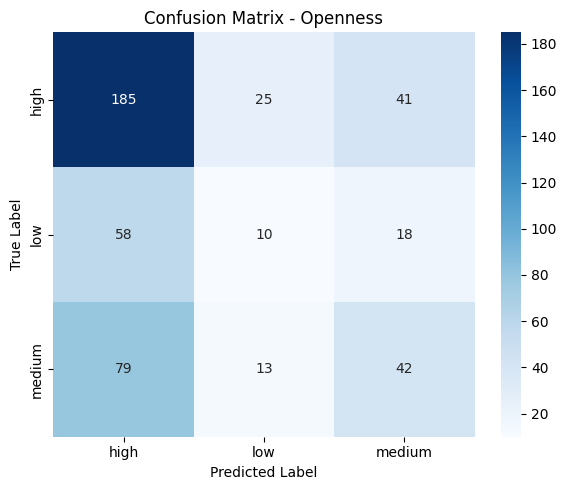

In [5]:
'''
Voting Ensemble Classifier (Random Forest + Gradient Boosting + MLP)
for predicting only Openness — NO SMOTE
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# === Load Data ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and Label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values

# === Normalize ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# === Classifiers ===
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('mlp', mlp)],
    voting='soft',
    n_jobs=-1
)

# === Train and Evaluate ===
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, zero_division=0)

print(f"\n=== OPENNESS ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score (macro): {f1:.4f}")
print(report)

# === Save Report ===
with open("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/ensemble_openness_no_smote.txt", "w") as f:
    f.write("Classification Report - Openness (Ensemble NO SMOTE)\n")
    f.write(f"Accuracy: {acc:.4f}\nF1-score (macro): {f1:.4f}\n")
    f.write(report)

print("Saved report to ensemble_openness_no_smote.txt")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- After predictions are made (y_test and y_pred exist) ---
cm = confusion_matrix(y_test, y_pred, labels=ensemble.classes_)
labels = ensemble.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Openness')
plt.tight_layout()
plt.savefig("/Users/arashalborz/Desktop/amiv_nlp_2025/classification/reports/conf_matrix_openness.png")
plt.show()

=== Classification Report ===
              precision    recall  f1-score   support

        high       0.60      0.62      0.61       174
         low       0.21      0.21      0.21        48
      medium       0.31      0.29      0.30        92

    accuracy                           0.46       314
   macro avg       0.37      0.37      0.37       314
weighted avg       0.46      0.46      0.46       314



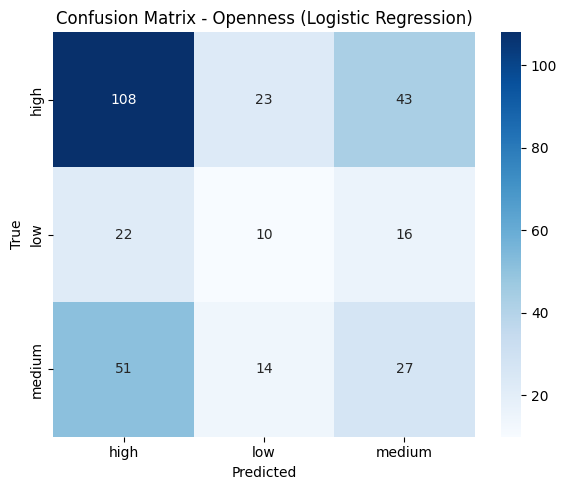

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Load your dataset ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values  # Make sure this matches your column name exactly

# === Split into train and test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Normalize ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Logistic Regression ===
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# === Classification report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Openness (Logistic Regression)")
plt.tight_layout()
plt.show()


/opt/anaconda3/envs/amiv_nlp_2025/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


=== Classification Report ===
              precision    recall  f1-score   support

        high       0.57      0.42      0.48       174
         low       0.20      0.29      0.24        48
      medium       0.28      0.35      0.31        92

    accuracy                           0.38       314
   macro avg       0.35      0.35      0.34       314
weighted avg       0.43      0.38      0.39       314



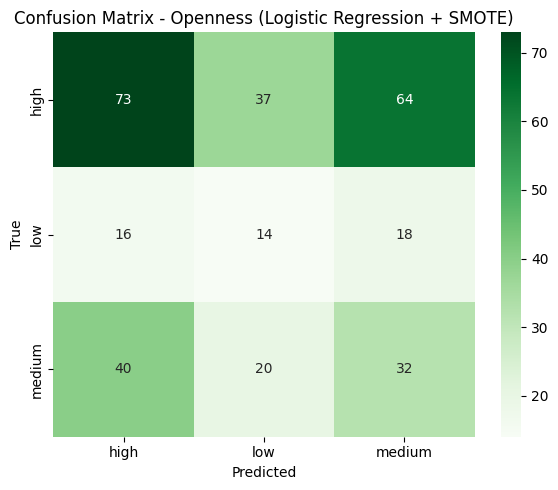

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# === Load dataset ===
df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")

# === Features and label ===
feature_cols = [col for col in df.columns if col.startswith("embed_") or col.startswith("liwc_")]
X = df[feature_cols].values
y = df["Openness"].values

# === Train/validation split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Apply SMOTE on training data only ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# === Logistic Regression ===
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test_scaled)

# === Classification report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# === Confusion matrix ===
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Openness (Logistic Regression + SMOTE)")
plt.tight_layout()
plt.show()

=== Classification Report (Validation Set) ===
              precision    recall  f1-score   support

        high       0.19      0.50      0.27         6
         low       0.40      0.10      0.16        20
      medium       0.27      0.50      0.35         6

    accuracy                           0.25        32
   macro avg       0.29      0.37      0.26        32
weighted avg       0.34      0.25      0.22        32



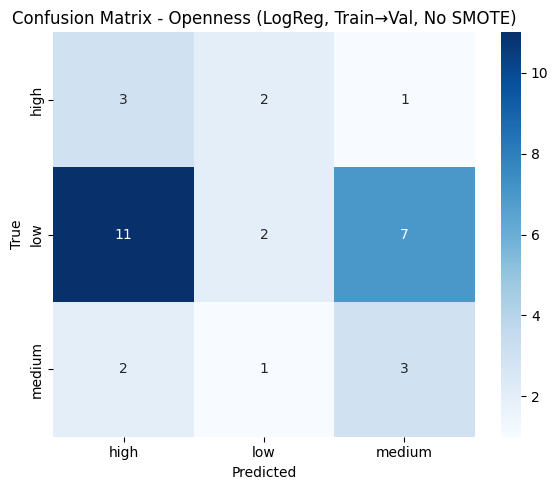

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Load data ===
train_df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")
val_df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/validation/comb_val_liwc_embed.csv")

# === Feature selection ===
feature_cols = [col for col in train_df.columns if col.startswith("embed_") or col.startswith("liwc_")]
feature_cols = [col for col in feature_cols if col in val_df.columns]  # ensure compatibility

X_train = train_df[feature_cols].values
X_val = val_df[feature_cols].values
y_train = train_df["Conscientiousness"].values
y_val = val_df["Conscientiousness"].values

# === Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Logistic Regression ===
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_val_scaled)

# === Evaluation ===
print("=== Classification Report (Validation Set) ===")
print(classification_report(y_val, y_pred, zero_division=0))

# === Confusion matrix ===
cm = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Openness (LogReg, Train→Val, No SMOTE)")
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/amiv_nlp_2025/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


=== Classification Report (Validation Set, with SMOTE) ===
              precision    recall  f1-score   support

        high       0.25      0.67      0.36         6
         low       0.50      0.10      0.17        20
      medium       0.25      0.50      0.33         6

    accuracy                           0.28        32
   macro avg       0.33      0.42      0.29        32
weighted avg       0.41      0.28      0.23        32



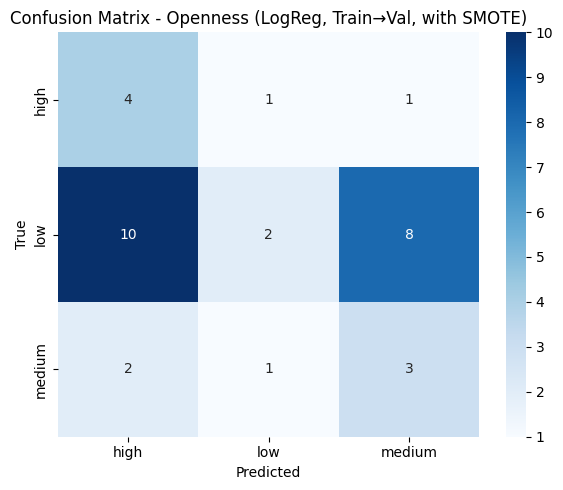

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# === Load data ===
train_df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/train/comb_train_liwc_embed.csv")
val_df = pd.read_csv("/Users/arashalborz/Desktop/amiv_nlp_2025/processed_data/validation/comb_val_liwc_embed.csv")

# === Feature columns ===
feature_cols = [col for col in train_df.columns if col.startswith("embed_") or col.startswith("liwc_")]
feature_cols = [col for col in feature_cols if col in val_df.columns]

X_train = train_df[feature_cols].values
y_train = train_df["Conscientiousness"].values

X_val = val_df[feature_cols].values
y_val = val_df["Conscientiousness"].values

# === Scale features ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === Apply SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# === Logistic Regression ===
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_val_scaled)

# === Evaluation ===
print("=== Classification Report (Validation Set, with SMOTE) ===")
print(classification_report(y_val, y_pred, zero_division=0))

# === Confusion matrix ===
cm = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Openness (LogReg, Train→Val, with SMOTE)")
plt.tight_layout()
plt.show()